In [1]:
!pip install deslib

In [2]:
# check deslib version
import deslib
print(deslib.__version__)

0.3.5


In [3]:
from sklearn.datasets import make_classification
from deslib.des.knora_e import KNORAE
from deslib.des.knora_u import KNORAU
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import numpy as np

# k-Nearest Neighbor Oracle (KNORA)

In [4]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, n_redundant=5, random_state=7)

In [5]:
# summarize the dataset
print(X.shape, y.shape)

(10000, 20) (10000,)


### KNORA-Eliminate (KNORA-E) 

In [6]:
# define the KNORA-E model
model_knorae = KNORAE()

In [7]:
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [8]:
# evaluate the model
n_scores = cross_val_score(model_knorae, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [9]:
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Mean Accuracy: 0.915 (0.008)


In [10]:
# fit the model on the whole dataset
model_knorae.fit(X, y)

KNORAE()

In [11]:
# make a single prediction
row = [0.2929949,-4.21223056,-1.288332,-2.17849815,-0.64527665,2.58097719,0.28422388,-7.1827928,-1.91211104,2.73729512,0.81395695,3.96973717,-2.66939799,3.34692332,4.19791821,0.99990998,-0.30201875,-4.43170633,-2.82646737,0.44916808]
yhat = model_knorae.predict([row])
print('Predicted Class: %d' % yhat[0])

Predicted Class: 0


### KNORA-Union (KNORA-U)

In [12]:
# define the KNORA-U model
model_knorau = KNORAU()

In [13]:
# evaluate the model
n_scores = cross_val_score(model_knorau, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [14]:
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Mean Accuracy: 0.936 (0.009)


In [15]:
# fit the model on the whole dataset
model_knorau.fit(X, y)

KNORAU()

In [16]:
# make a single prediction
row = [0.2929949,-4.21223056,-1.288332,-2.17849815,-0.64527665,2.58097719,0.28422388,-7.1827928,-1.91211104,2.73729512,0.81395695,3.96973717,-2.66939799,3.34692332,4.19791821,0.99990998,-0.30201875,-4.43170633,-2.82646737,0.44916808]
yhat = model_knorau.predict([row])
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


# Hyperparameter Tuning for KNORA

### Explore k in k-Nearest Neighbors

In [17]:
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
    return X, y

In [18]:
# get a list of models to evaluate
def get_models():
    models = dict()
    for n in range(2,22):
        models[str(n)] = KNORAU(k=n)
    return models

In [19]:
# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [20]:
# define dataset
X, y = get_dataset()

In [21]:
# get the models to evaluate
models = get_models()

In [22]:
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>2 0.935 (0.010)
>3 0.935 (0.009)
>4 0.935 (0.009)
>5 0.937 (0.010)
>6 0.935 (0.009)
>7 0.937 (0.007)
>8 0.934 (0.008)
>9 0.936 (0.008)
>10 0.935 (0.010)
>11 0.936 (0.009)
>12 0.935 (0.010)
>13 0.935 (0.008)
>14 0.936 (0.009)
>15 0.936 (0.009)
>16 0.936 (0.009)
>17 0.935 (0.008)
>18 0.935 (0.010)
>19 0.936 (0.008)
>20 0.936 (0.009)
>21 0.935 (0.007)


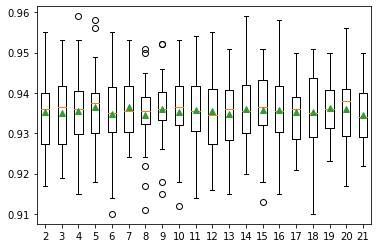

In [23]:
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

### Explore Algorithms for Classifier Pool

In this case, we will use a pool that includes logistic regression, a decision tree, and a naive Bayes classifier.

In [24]:
X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, n_redundant=5, random_state=7)

In [25]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [26]:
# define classifiers to use in the pool
classifiers = [LogisticRegression(), DecisionTreeClassifier(), GaussianNB()]

In [27]:
# fit each classifier on the training set
for c in classifiers:
    c.fit(X_train, y_train)

In [28]:
# define the KNORA-U model
model_knorau = KNORAU(pool_classifiers=classifiers)

In [29]:
# fit the model
model_knorau.fit(X_train, y_train)

KNORAU(pool_classifiers=[LogisticRegression(), DecisionTreeClassifier(),
                         GaussianNB()])

In [30]:
# make predictions on the test set
yhat = model_knorau.predict(X_test)

In [31]:
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (score))

Accuracy: 0.913


In [32]:
# evaluate contributing models
for c in classifiers:
    yhat = c.predict(X_test)
    score = accuracy_score(y_test, yhat)
    print('>%s: %.3f' % (c.__class__.__name__, score))

>LogisticRegression: 0.878
>DecisionTreeClassifier: 0.882
>GaussianNB: 0.873


We can use a random forest ensemble with 1,000 members as the base classifiers to consider within KNORA as follows:

In [33]:
# define classifiers to use in the pool
pool = RandomForestClassifier(n_estimators=1000)

In [34]:
# fit the classifiers on the training set
pool.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [35]:
# define the KNORA-U model
model_knorau = KNORAU(pool_classifiers=pool)

In [36]:
# fit the model
model_knorau.fit(X_train, y_train)

KNORAU(pool_classifiers=RandomForestClassifier(n_estimators=1000))

In [37]:
# make predictions on the test set
yhat = model_knorau.predict(X_test)

In [38]:
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (score))

Accuracy: 0.968


In [39]:
# evaluate the standalone model
yhat = pool.predict(X_test)
score = accuracy_score(y_test, yhat)
print('>%s: %.3f' % (pool.__class__.__name__, score))

>RandomForestClassifier: 0.968
